# How many MODIS points do we have for each ERA point?

In [52]:
import pandas as pd
f = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/joined_data/ExampleHaversine_MODIS_ERA_2020_01.parquet'
df = pd.read_parquet(f,columns = ['latitude_ERA', 'longitude_ERA','time','number_of_modis_observations'])

In [53]:
df

time  number_of_modis_observations
latitude_ERA longitude_ERA                                                  
54.379367    -164.53125    2020-01-01 00:00:00                             3
             -162.65625    2020-01-01 00:00:00                             2
             -162.18750    2020-01-01 00:00:00                             1
54.660397    -165.00000    2020-01-01 00:00:00                             2
             -164.53125    2020-01-01 00:00:00                            23
...                                        ...                           ...
70.117048    -147.00000    2020-01-31 23:00:00                            19
             -146.25000    2020-01-31 23:00:00                            11
             -144.00000    2020-01-31 23:00:00                            13
             -143.25000    2020-01-31 23:00:00                            23
             -142.50000    2020-01-31 23:00:00                             8

[2991959 rows x 2 columns]

In [62]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 







def EuclideanPlot(ds,z,vmin,vmax,cmap,logscale,title,limits,markersize,savefig):
    
    try:
        x = ds.longitude
        y = ds.latitude
    except: # different sources call lat/lon different things
        x = ds.longitude_ERA
        y = ds.latitude_ERA
    
    z1 = ds[z]
    

    
    #Setup figure and axes
    fig = plt.figure(figsize=[30,20])
    gs = GridSpec(1, 2, figure=fig, width_ratios=[50,1])
    ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=0))
    cax = fig.add_subplot(gs[1])
    
    
    
    
    
    #Normalise
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        
    print ('vmin,vmax = ', vmin,vmax)
    
    
    
    
    #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
    
    
    
    
    
    
    
    #Plot it
    sc=ax.scatter(x,y,s=markersize,c=cmap(norm(z1)),
                linewidths=1, alpha=.7)

    
    #Tidy up
    ax.axhline(70, c='0.5', linestyle='--')
    ax.axhline(-70, c='0.5', linestyle='--') #latitude cutoffs

    ax.set_title(title,fontsize=30)    
    ax.coastlines()

    
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_aspect('auto') #Force projection aspect ratio
    
    if limits is not None:
        ax.set_xlim(limits['xlow'],limits['xhigh'])
        ax.set_ylim(limits['ylow'],limits['yhigh'])
        ax.set_xticks([])
        ax.set_yticks([])
        
    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)

    plt.show()
    
    






def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.10, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        
    print ('vmin,vmax = ', vmin,vmax)
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    #Formatting
    cax.tick_params(labelsize=16)
    cax.set_xlabel('Sum',fontsize=16)

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    
    

In [63]:
df_averaged = df.groupby(['latitude_ERA', 'longitude_ERA']).sum()

vmin,vmax =  1 6167
vmin,vmax =  1 6167


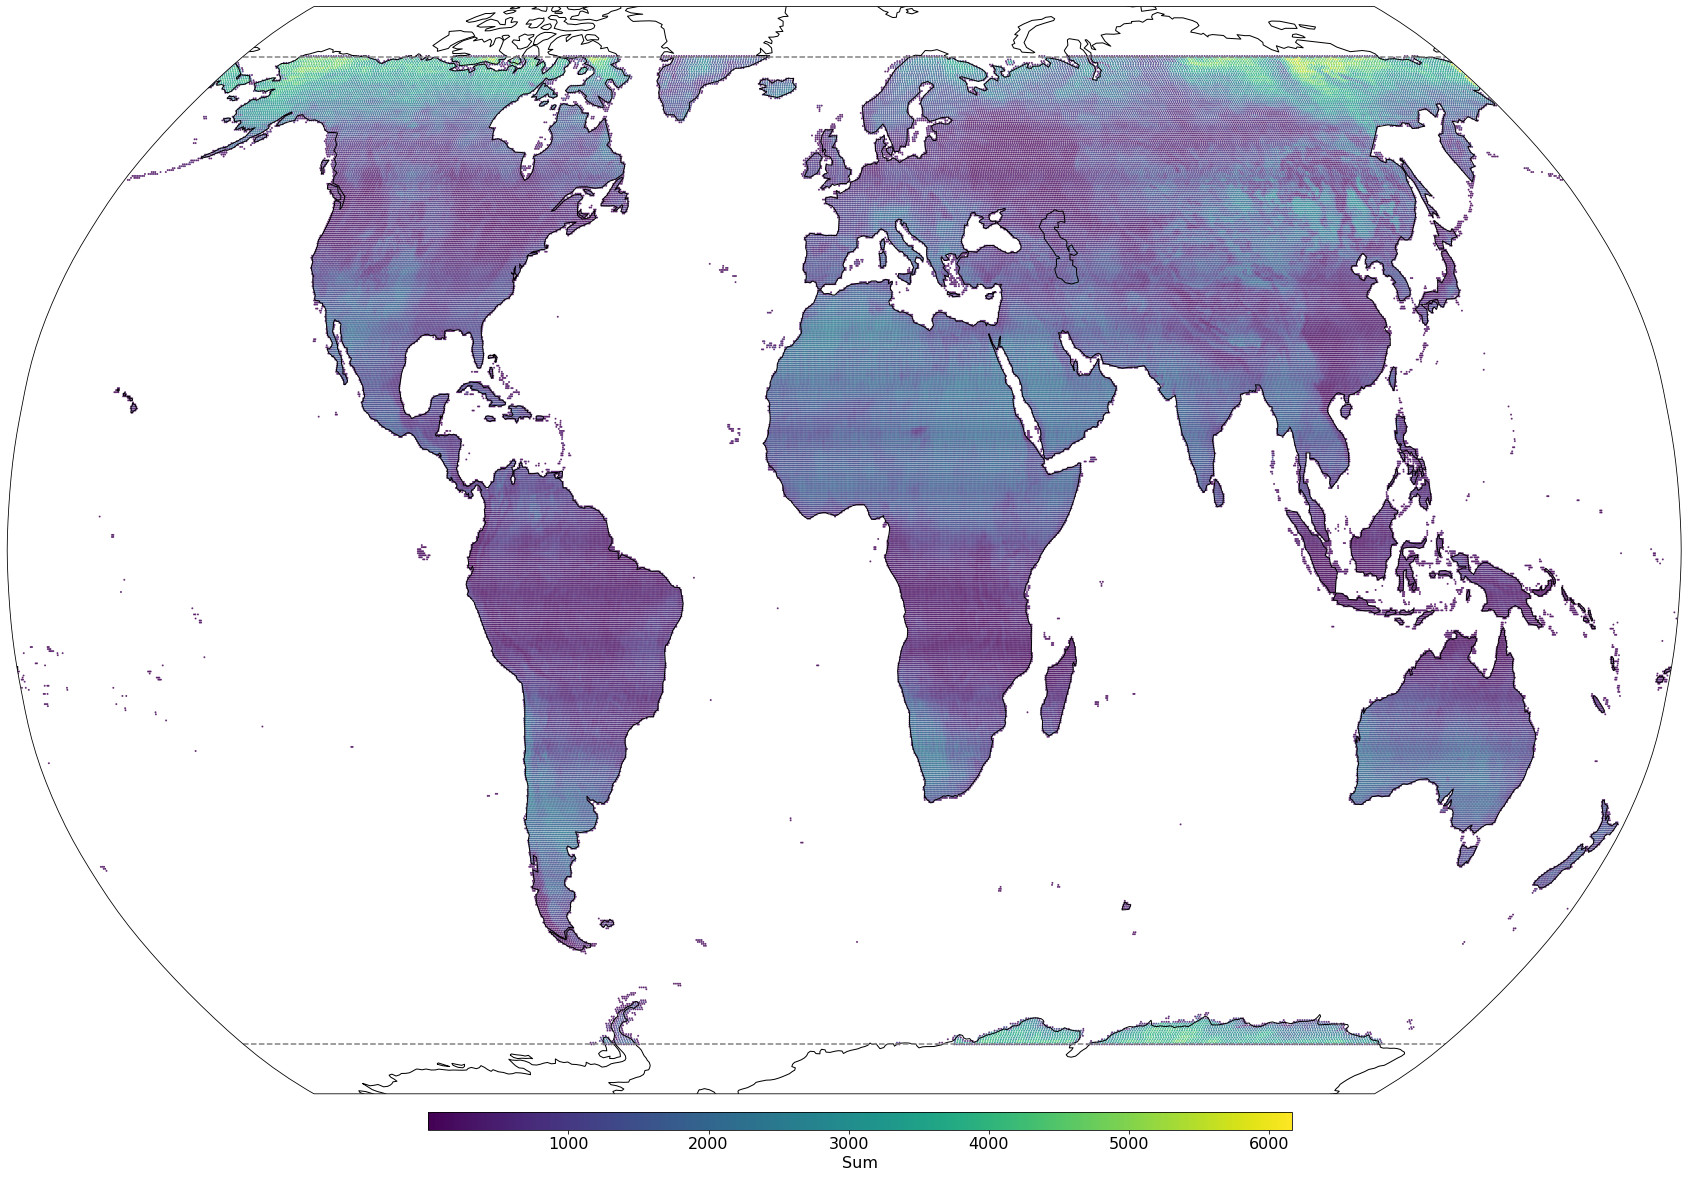

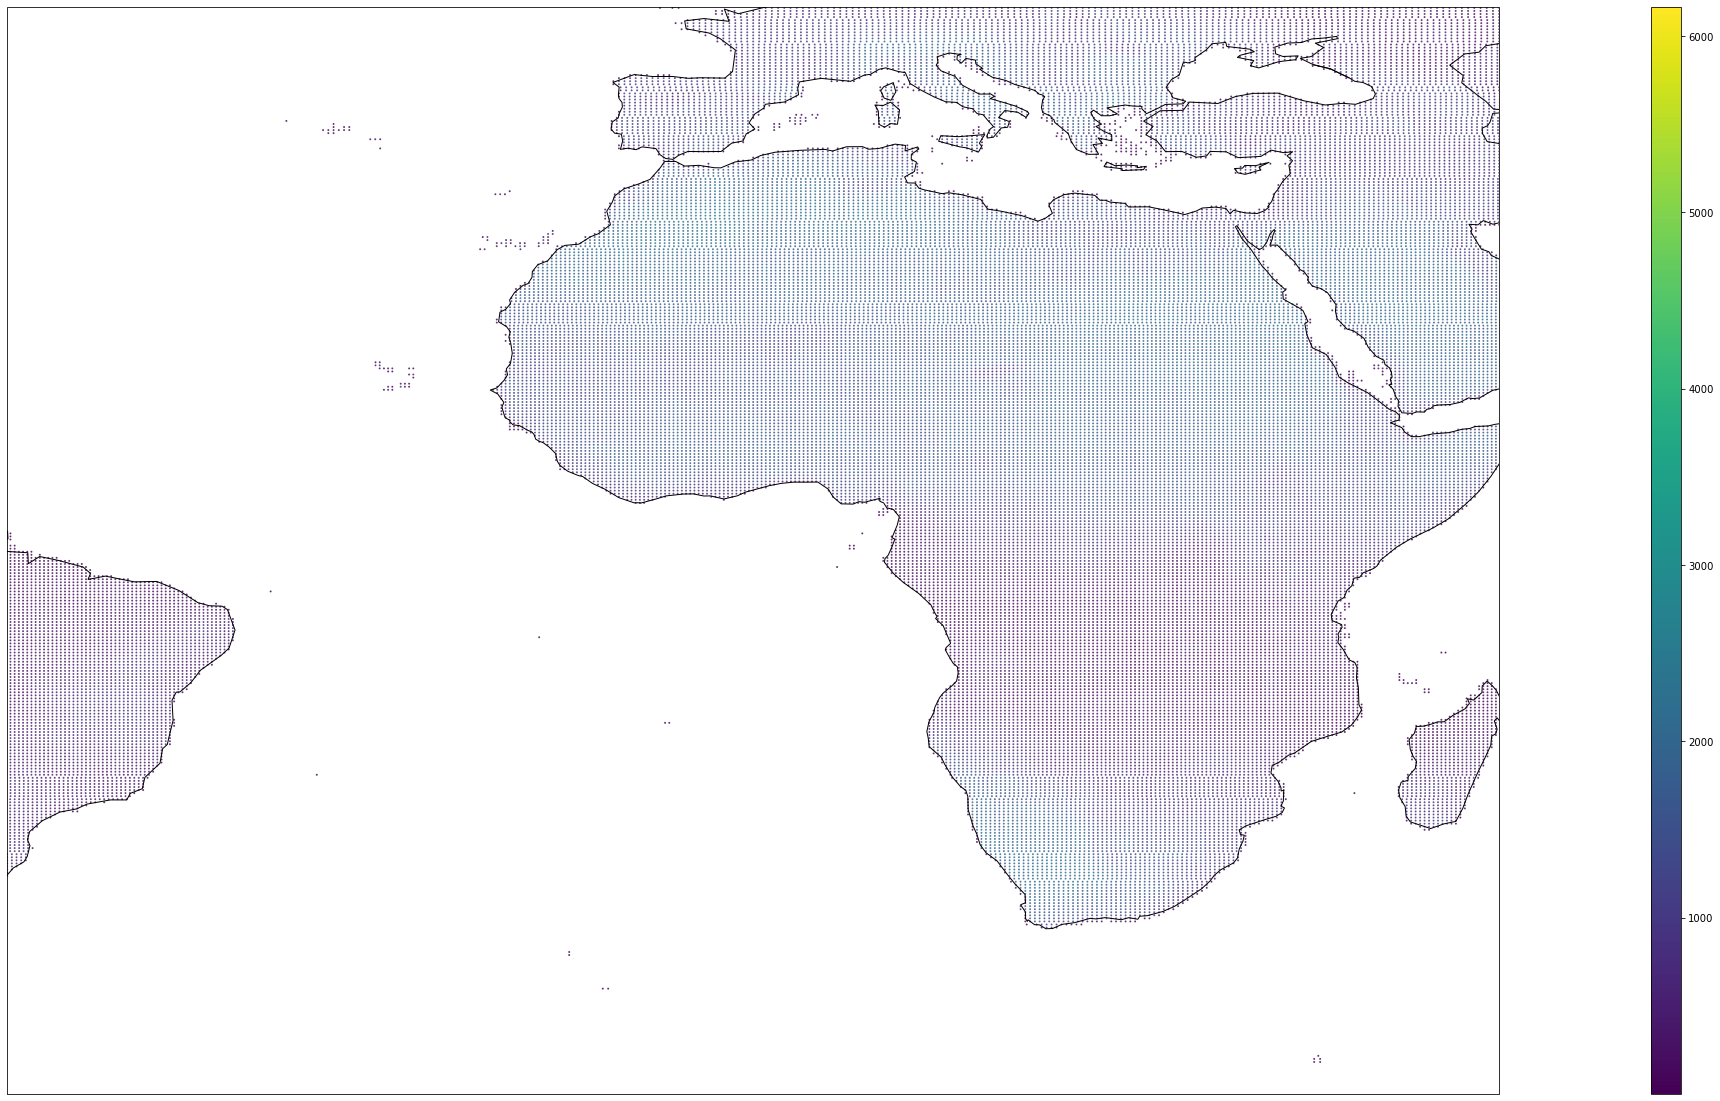

In [65]:
RobinsonPlot(df_averaged.reset_index(),'number_of_modis_observations',vmin=None,vmax=None,cmap=plt.cm.viridis,markersize=1,savefig=None)

limits = {'xlow': -50,
         'xhigh': 50,
         'ylow': -50,
         'yhigh': 50}

EuclideanPlot(df_averaged.reset_index(),'number_of_modis_observations',vmin=None,vmax=None,cmap=plt.cm.viridis,logscale=False,title=None,limits=limits,markersize=1,savefig=None)
